# GUI Features in OpenCV

## Load image

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("./images/lenna.png")

image = cv2.resize(image, (500,500))

cv2.imshow("Lenna", image)

k = cv2.waitKey(0)
if k == ord('q'):
    cv2.destroyAllWindows()

## Load video

In [2]:
import numpy as np
# cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     print("Error: Could not open camera.")
#     exit()

# while True:
#     ret, frame = cap.read()
    
#     if not ret:
#         print("Error: Could not read frame.")
#         break
    
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    
#     cv2.imshow("Video", gray)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
    
# cap.release()
# cv2.destroyAllWindows()

## Drawing functions in OpenCV

In [3]:
def displayImage(image):
    cv2.imshow("Image", image)
    
    k = cv2.waitKey(0)
    if k == ord('q'):
        cv2.destroyAllWindows()

In [8]:
black_image = np.zeros(shape=(500,500,3), dtype=np.uint8)

# Drawing a line ( diagonal line of thickness 5 and yellow color )
cv2.line(black_image, (0,0), (500,500), (0,255,255), 5)

# Drawing a Circle of radius 100 and center at (250,250) with color (0,100,120) and thickness 5
cv2.circle(black_image, (250,250), 100, (0,100,120), 5)

# Drawing a rectangle
cv2.rectangle(black_image, (50,50), (450,450), (255,0,0), 5)

displayImage(black_image)


In [35]:
white_image = np.ones(shape=(700, 700), dtype=np.uint8) * 255

# Drawing Polygon
points = np.array([[100,100], [200,200], [300,100], [200,50]], np.int32)
# np.expand_dims(points, axis=1)

cv2.polylines(white_image, [points], isClosed=True, color=(0,0,0), thickness=5)

cv2.putText(white_image, "PolyGon Image", (100,400), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,0), 5)

displayImage(white_image)

## Mouse as a Paint-Brush

In [36]:
def draw_circle(event, x,y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(white_image, (x,y),100, (0,0,100), 3)
        
cv2.namedWindow("White Image")
cv2.setMouseCallback("White Image", draw_circle)

while 1:
    cv2.imshow("White Image", white_image)
    
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()

# HSV Mask

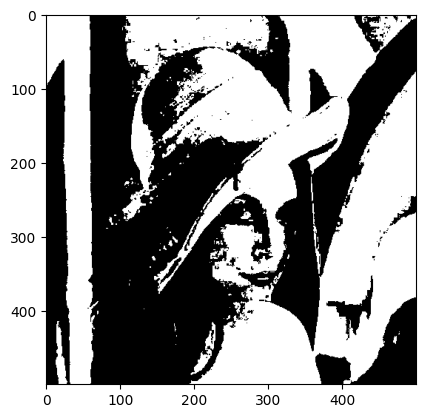

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("./images/lenna.png")
image = cv2.resize(image, (500,500))
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([0,0,0])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)
frame = cv2.bitwise_and(image, image, mask=mask)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))